# Introduction #


In [1]:
import pandas as pd

autos = pd.read_csv("../input/fe-course-data/autos.csv")

# Target Encoding #


In [76]:
autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

# autos[["make", "price", "make_encoded"]].loc[autos["make"] == 'chevrolet'] # in_cat avg
# autos[["make", "price", "make_encoded"]].make_encoded.mean()  # overall avg
# autos["make"].value_counts()['chevrolet'] #freq


# autos[["make", "price", "make_encoded"]].head()

,make,price,make_encoded
17,chevrolet,5151,6007.0
18,chevrolet,6295,6007.0
19,chevrolet,6575,6007.0


# Smoothing #
# Example - MovieLens1M #


In [44]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("../input/fe-course-data/movielens1m.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [58]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]

X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [52]:
# pip install category_encoders

     -------------------------------------- 81.8/81.8 kB 656.8 kB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 336.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

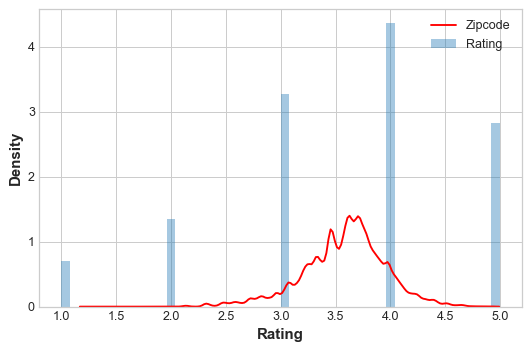

In [68]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);